# 1. load drive and install and load dependencies

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pycaret

  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pyod-0.9.5-py3-none-any.whl
  Using cached scikit_learn-0.23.2-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached lightgbm-3.3.1-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached mlflow-1.21.0-py3-none-any.whl (16.9 MB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cache

In [ ]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.8.1-py3-none-any.whl (189 kB)
  Using cached scikit_learn-1.0.1-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.7.0
    Uninstalling imbalanced-learn-0.7.0:
      Successfully uninstalled imbalanced-learn-0.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.4 requires imbalanced-learn==0.7.0, but you have imbalanced-learn 0.8.1 which is incompatible.
pycaret 2.3.4 requires scikit-learn==0.23.2, but you have scikit-learn 1.0.1 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret

# 2. import data

In [ ]:
!unzip '/content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip'

Archive:  /content/gdrive/MyDrive/Idorsia Capstone Project/data/subsample_nonrandom_cellstate.zip
  inflating: subsample_nonrandom_cellstate.csv  


In [ ]:
data = pd.read_csv('subsample_nonrandom_cellstate.csv', index_col=0)
data.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,APP,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.317720,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0.090300,-0.250339,-0.391124,-0.246797,-0.189673,-0.616370,-0.316149,-0.356780,1.552249,-0.499215,-0.194878,-0.352990,-0.163568,-0.190939,-0.415853,-0.124281,-0.304426,-0.387812,-0.252874,-0.383583,0.478811,...,-0.376699,-0.175378,-0.423910,3.649650,0.573384,-0.158770,-0.188699,2.267675,-0.512170,-0.245922,3.651268,-0.132690,1.799477,-0.281949,-0.423601,-1.135320,-0.286250,-0.279708,1.809676,-0.224231,-0.168162,0.632239,0.123286,-0.175944,-0.220324,-0.176385,2.226596,-0.234638,-0.340674,0.107710,-0.300499,-0.697762,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell
GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,-0.325609,-0.101256,-0.445847,-0.054851,-0.181723,-0.380540,0.745766,-0.340088,-0.296601,-0.241316,-0.085254,-0.250838,-0.386196,-0.265224,-0.204572,1.161881,-0.348388,-0.398905,-0.398163,-0.419860,-0.160300,-0.324923,-0.167410,-0.184236,-0.413217,-0.116076,-0.267485,2.620898,-0.213646,-0.346287,0.473759,...,-0.379510,-0.161681,-0.407552,-0.199226,0.747376,-0.154697,-0.173045,-0.448623,-0.300369,-0.162582,-0.359982,-0.056778,-0.593834,-0.284930,-0.450226,-0.950650,-0.266962,-0.173080,-0.193029,-0.163202,-0.117656,-0.828857,0.615416,-0.188198,-0.232735,6.823150,-0.344204,-0.206602,-0.350901,-1.130293,-1.156253,-0.963172,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,-0.297223,-0.101166,1.608985,-0.140124,-0.271896,-0.354905,0.266322,-0.353312,-0.320826,-0.314254,-0.094236,-0.274962,-0.415112,-0.245446,-0.184044,0.767068,-0.328530,-0.382333,-0.381429,-0.453147,-0.170926,-0.326742,-0.175238,-0.190458,-0.398930,-0.119770,-0.284986,-0.348206,-0.230224,-0.346436,0.211194,...,-0.373447,-0.165846,-0.392569,-0.233672,0.831479,-0.168126,3.846999,-0.479853,1.033201,-0.187547,-0.372761,-0.085260,1.248135,-0.266786,-0.417092,-1.064433,-0.307412,1.567685,-0.260816,2.432520,-0.142164,1.474821,0.259275,-0.174021,4.692780,-0.172141,-0.333820,-0.195588,-0.349128,0.346556,-0.558187,-0.403170,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell
GSM3148575_AAACCTGGTAGCACGA,-0.096117,1.804662,-0.347806,

## add new cell type lables for T cell hierarchical models

In [ ]:
category_dict_2 = {
   'CD4 naive T-cell': 'CD4 T-cell',
   'CD4 regulatory T-cell (unspecified)': 'CD4 T-cell',
   'CD8 effector memory T-cell': 'CD8 T-cell',
   'CD4 helper T-cell (unspecified)': 'CD4 T-cell',
   'CD8 memory T-cell (unspecified)': 'CD8 T-cell',
   'CD4 follicular helper T-cell': 'CD4 T-cell',
   'CD8 T-cell (unspecified)': 'CD8 T-cell',
   'CD8 resident memory T-cell': 'CD8 T-cell',
   'B-cell (unspecified)': 'B-cell',
   'CD8 activated T-cell (unspecified)': 'CD8 T-cell',
   'macrophage': 'macrophage',
   'plasma cell': 'plasma cell',
   'CD8 exhausted T-cell (unspecified)': 'CD8 T-cell',
   'natural killer cell': 'killer cell',
   'CD8 exhausted resident memory T-cell': 'CD8 T-cell',
   'NK T-cell (unspecified)': 'other T-cell',
   'Th17 T-cell': 'other T-cell',
   'M2 macrophage': 'macrophage',
   'CD8 cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'classical monocyte': 'monocyte',
   'CD4 T-cell (unspecified)': 'CD4 T-cell',
   'GC-dependent memory B-cell': 'B-cell',
   'T-cell (unspecified)': 'other T-cell',
   'non-classical monocyte': 'monocyte',
   'lymphocyte': 'lymphocyte',
   'naive B-cell': 'B-cell',
   'granulocyte': 'granulocyte',
   'conventional dendritic cell': 'dendritic cell',
   'CD8 exhausted cytotoxic T-cell (unspecified)': 'CD8 T-cell',
   'mast cell': 'mast cell',
   'conventional dendritic cell 2': 'dendritic cell',
   'plasmacytoid dendritic cell': 'dendritic cell',
   'dendritic cell': 'dendritic cell',
   'CD8 naive T-cell': 'CD8 T-cell',
   'leukocyte': 'leukocyte',
   'M1 macrophage': 'macrophage',
   'perivascular M2 macrophage': 'macrophage',
   'myeloid cell (unspecified)': 'myeloid cell',
   'CD4 central memory T-cell': 'CD4 T-cell',
   'GC-independent memory B-cell': 'B-cell',
   'CD8 central memory T-cell': 'CD8 T-cell',
   'conventional dendritic cell 1': 'dendritic cell',
   'gd T-cell (unspecified)': 'other T-cell'
}

In [ ]:
data['cell_type_2'] = data['cell_state'].apply(lambda cell: category_dict_2[cell])
data.head()

,PLEKHN1,ISG15,TNFRSF18,TNFRSF4,DVL1,CCNL2,MIB2,SLC35E2B,CDK11A,SKI,PLCH2,KCNAB2,ACOT7,TNFRSF25,RERE,ENO1,PIK3CD,CLSTN1,SRM,FBXO2,FBXO44,AGTRAP,MTHFR,CLCN6,TNFRSF1B,VPS13D,DHRS3,PRDM2,EFHD2,DDI2,SPEN,CROCC,ATP13A2,UBR4,OTUD3,ECE1,USP48,LUZP1,ID3,RPL11,...,MAP3K7CL,BACH1,TIAM1,SOD1,EVA1C,PAXBP1,IFNGR2,MRPS6,SLC5A3,RUNX1,CBR3,TTC3,DYRK1A,ETS2,HMGN1,MX2,MX1,ABCG1,UBASH3A,PKNOX1,CSTB,ITGB2,ADARB1,COL18A1,LSS,MCM3AP,PCNT,DIP2A,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP6,MT-CO3,MT-ND4,MT-ND5,MT-CYB,cell_state,cell_type,cell_type_2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3148575_AAACCTGAGGTCGGAT,-0.120063,-0.666726,-0.496918,-0.479612,-0.099574,-0.387737,-0.331833,-0.229907,-0.339842,-0.270848,-0.107915,-0.511503,-0.277814,-0.462453,-0.301821,-0.231361,-0.385800,1.894113,-0.409136,-0.109023,2.349367,-0.435257,-0.191539,-0.136378,-0.744321,2.390128,-0.294596,-0.378270,-0.488496,-0.214503,-0.341572,-0.187895,-0.198950,-0.382059,-0.128542,-0.316360,-0.427453,-0.296122,-0.351139,0.940758,...,-0.146983,-0.368192,-0.313880,-0.352356,-0.183203,-0.200532,-0.435039,-0.778602,-0.322719,-0.392403,-0.144354,1.709019,-0.244584,-0.330453,-0.207097,-0.389824,-0.495193,-0.413506,-0.380598,-0.215174,0.413374,0.562191,-0.152656,-0.198916,-0.165524,-0.311806,-0.194028,-0.357682,0.758289,0.298942,-0.276559,0.844270,-0.499903,0.963173,-1.022702,0.769905,0.832802,CD8 T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGCAACACCCG,-0.078043,-0.358352,-0.240397,-0.199843,-0.128613,-0.371469,-0.267228,-0.253885,-0.292382,-0.313821,-0.088790,-0.466089,-0.226714,-0.270607,-0.353075,0.574824,-0.335640,-0.314195,-0.323180,-0.090300,-0.250339,-0.391124,-0.246797,-0.189673,-0.616370,-0.316149,-0.356780,1.552249,-0.499215,-0.194878,-0.352990,-0.163568,-0.190939,-0.415853,-0.124281,-0.304426,-0.387812,-0.252874,-0.383583,0.478811,...,-0.175378,-0.423910,3.649650,0.573384,-0.158770,-0.188699,2.267675,-0.512170,-0.245922,3.651268,-0.132690,1.799477,-0.281949,-0.423601,-1.135320,-0.286250,-0.279708,1.809676,-0.224231,-0.168162,0.632239,0.123286,-0.175944,-0.220324,-0.176385,2.226596,-0.234638,-0.340674,0.107710,-0.300499,-0.697762,-0.948415,-0.213541,-0.709115,-0.041497,-0.356811,-0.065298,CD4 naive T-cell,T-cell,CD4 T-cell
GSM3148575_AAACCTGCACCCATGG,-0.062416,-0.195464,-0.065144,-0.042499,-0.135852,-0.351616,-0.248396,-0.270842,-0.268271,-0.325609,-0.101256,-0.445847,-0.054851,-0.181723,-0.380540,0.745766,-0.340088,-0.296601,-0.241316,-0.085254,-0.250838,-0.386196,-0.265224,-0.204572,1.161881,-0.348388,-0.398905,-0.398163,-0.419860,-0.160300,-0.324923,-0.167410,-0.184236,-0.413217,-0.116076,-0.267485,2.620898,-0.213646,-0.346287,0.473759,...,-0.161681,-0.407552,-0.199226,0.747376,-0.154697,-0.173045,-0.448623,-0.300369,-0.162582,-0.359982,-0.056778,-0.593834,-0.284930,-0.450226,-0.950650,-0.266962,-0.173080,-0.193029,-0.163202,-0.117656,-0.828857,0.615416,-0.188198,-0.232735,6.823150,-0.344204,-0.206602,-0.350901,-1.130293,-1.156253,-0.963172,-0.502495,-1.301666,-0.408829,-0.945157,-0.162975,-0.711097,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGCAGATGGGT,-0.082079,1.060037,-0.191346,-0.169694,-0.122829,2.005691,-0.276818,-0.259534,-0.277136,-0.297223,-0.101166,1.608985,-0.140124,-0.271896,-0.354905,0.266322,-0.353312,-0.320826,-0.314254,-0.094236,-0.274962,-0.415112,-0.245446,-0.184044,0.767068,-0.328530,-0.382333,-0.381429,-0.453147,-0.170926,-0.326742,-0.175238,-0.190458,-0.398930,-0.119770,-0.284986,-0.348206,-0.230224,-0.346436,0.211194,...,-0.165846,-0.392569,-0.233672,0.831479,-0.168126,3.846999,-0.479853,1.033201,-0.187547,-0.372761,-0.085260,1.248135,-0.266786,-0.417092,-1.064433,-0.307412,1.567685,-0.260816,2.432520,-0.142164,1.474821,0.259275,-0.174021,4.692780,-0.172141,-0.333820,-0.195588,-0.349128,0.346556,-0.558187,-0.403170,-0.261556,-1.011853,0.050656,-0.792443,0.404270,0.123457,CD8 activated T-cell (unspecified),T-cell,CD8 T-cell
GSM3148575_AAACCTGGTAGCACGA,-0.096117,1.80466

# 3. B Cells

In [ ]:
df = data[data['cell_type'] == 'B-cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
B-cell (unspecified),250,0.316456
GC-dependent memory B-cell,250,0.316456
naive B-cell,250,0.316456
GC-independent memory B-cell,40,0.050633


## Split Data

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.84158324, 0.85829337, 0.93539859, 0.896406  , 0.9046954 ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_b_cells.sav'
joblib.dump(lr, filename)

['lr_model_b_cells.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  89.87
F1 of logistic regression model :  89.85
F1 macro of logistic regression model :  87.78


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                              precision    recall  f1-score   support

        B-cell (unspecified)       0.93      0.86      0.90        50
  GC-dependent memory B-cell       0.84      0.96      0.90        50
GC-independent memory B-cell       0.86      0.75      0.80         8
                naive B-cell       0.94      0.90      0.92        50

                    accuracy                           0.90       158
                   macro avg       0.89      0.87      0.88       158
                weighted avg       0.90      0.90      0.90       158



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  4,  1,  2],
       [ 1, 48,  0,  1],
       [ 2,  0,  6,  0],
       [ 0,  5,  0, 45]])

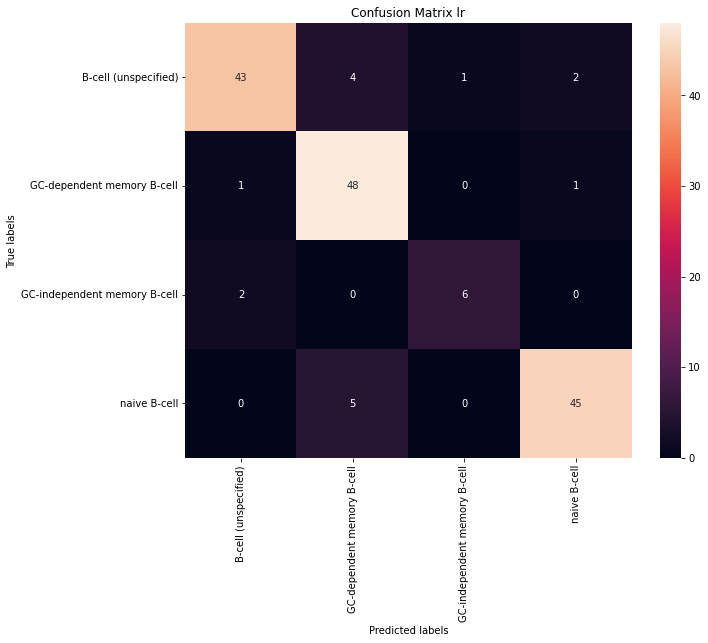

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

## oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

naive B-cell                    200
B-cell (unspecified)            200
GC-dependent memory B-cell      200
GC-independent memory B-cell     32
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'GC-dependent memory B-cell': 200,
    'naive B-cell': 200,
    'B-cell (unspecified)': 200,
    'GC-independent memory B-cell': 50
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

naive B-cell                    200
B-cell (unspecified)            200
GC-dependent memory B-cell      200
GC-independent memory B-cell     32
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

naive B-cell                    200
B-cell (unspecified)            200
GC-dependent memory B-cell      200
GC-independent memory B-cell     50
Name: cell_state, dtype: int64

### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.85319361, 0.88579055, 0.92171267, 0.8998278 , 0.91497623])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_b_cells_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_b_cells_smote.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  89.24
F1 weighted of logistic regression model :  89.36
F1 macro of logistic regression model :  86.93


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                              precision    recall  f1-score   support

        B-cell (unspecified)       0.96      0.86      0.91        50
  GC-dependent memory B-cell       0.83      0.96      0.89        50
GC-independent memory B-cell       0.70      0.88      0.78         8
                naive B-cell       0.96      0.86      0.91        50

                    accuracy                           0.89       158
                   macro avg       0.86      0.89      0.87       158
                weighted avg       0.90      0.89      0.89       158



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[43,  4,  1,  2],
       [ 1, 48,  1,  0],
       [ 1,  0,  7,  0],
       [ 0,  6,  1, 43]])

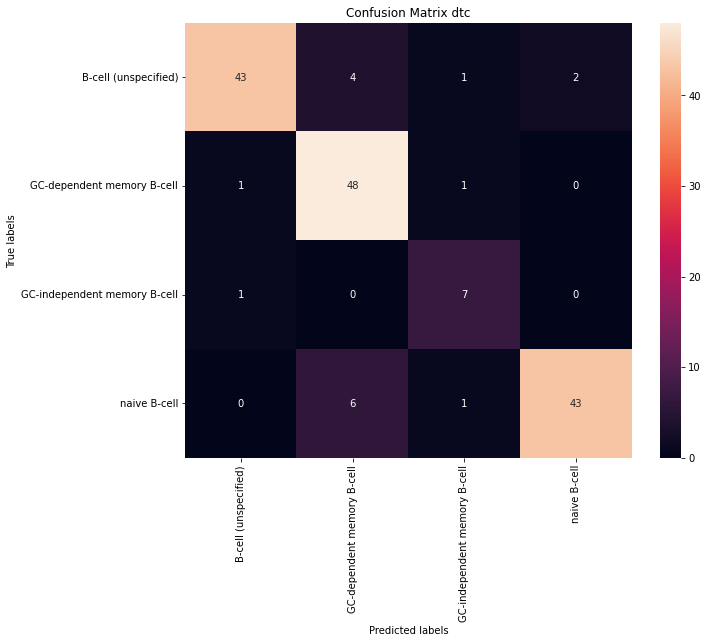

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 4. Dendritic Cells

In [ ]:
df = data[data['cell_type'] == 'dendritic cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
conventional dendritic cell,250,0.254582
conventional dendritic cell 2,250,0.254582
plasmacytoid dendritic cell,250,0.254582
dendritic cell,203,0.206721
conventional dendritic cell 1,29,0.029532


## split data

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.9810603 , 0.96189712, 0.97447218, 0.96794786, 0.96141841])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_dendritic_cells.sav'
joblib.dump(lr, filename)

['lr_model_dendritic_cells.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  93.4
F1 of logistic regression model :  93.35
F1 macro of logistic regression model :  93.09


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                               precision    recall  f1-score   support

  conventional dendritic cell       0.90      0.86      0.88        50
conventional dendritic cell 1       0.86      1.00      0.92         6
conventional dendritic cell 2       0.91      1.00      0.95        50
               dendritic cell       0.95      0.88      0.91        41
  plasmacytoid dendritic cell       1.00      0.98      0.99        50

                     accuracy                           0.93       197
                    macro avg       0.92      0.94      0.93       197
                 weighted avg       0.94      0.93      0.93       197



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  1,  4,  2,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0, 50,  0,  0],
       [ 5,  0,  0, 36,  0],
       [ 0,  0,  1,  0, 49]])

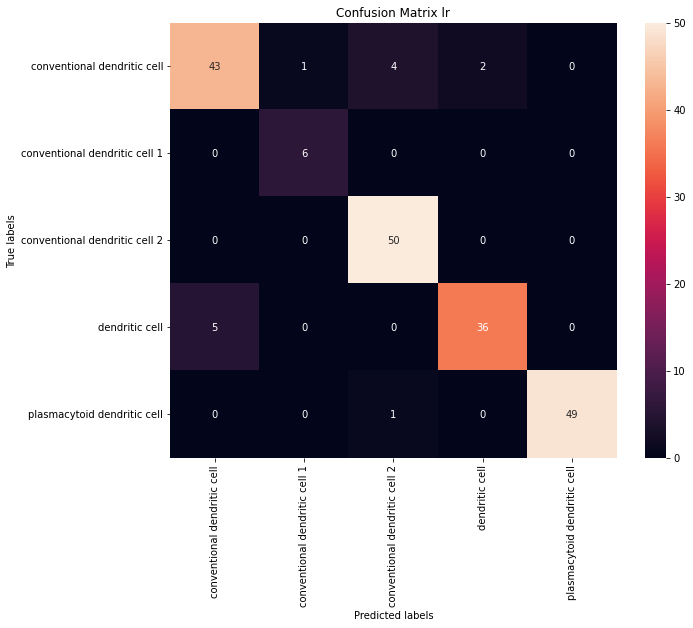

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

## oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

plasmacytoid dendritic cell      200
conventional dendritic cell      200
conventional dendritic cell 2    200
dendritic cell                   162
conventional dendritic cell 1     23
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'conventional dendritic cell 2': 200,
    'plasmacytoid dendritic cell': 200,
    'conventional dendritic cell': 200,
    'dendritic cell': 162,
    'conventional dendritic cell 1': 50
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

plasmacytoid dendritic cell      200
conventional dendritic cell      200
conventional dendritic cell 2    200
dendritic cell                   162
conventional dendritic cell 1     23
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

plasmacytoid dendritic cell      200
conventional dendritic cell      200
conventional dendritic cell 2    200
dendritic cell                   162
conventional dendritic cell 1     50
Name: cell_state, dtype: int64

### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.98162468, 0.96330418, 0.97526008, 0.96894915, 0.96241874])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_dendritic_cells_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_dendritic_cells_smote.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  93.4
F1 weighted of logistic regression model :  93.35
F1 macro of logistic regression model :  93.09


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                               precision    recall  f1-score   support

  conventional dendritic cell       0.90      0.86      0.88        50
conventional dendritic cell 1       0.86      1.00      0.92         6
conventional dendritic cell 2       0.91      1.00      0.95        50
               dendritic cell       0.95      0.88      0.91        41
  plasmacytoid dendritic cell       1.00      0.98      0.99        50

                     accuracy                           0.93       197
                    macro avg       0.92      0.94      0.93       197
                 weighted avg       0.94      0.93      0.93       197



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[43,  1,  4,  2,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0, 50,  0,  0],
       [ 5,  0,  0, 36,  0],
       [ 0,  0,  1,  0, 49]])

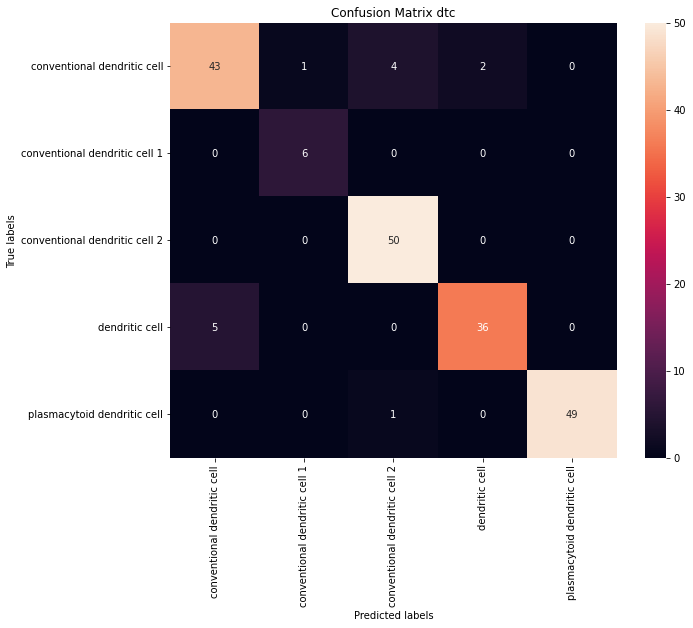

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 5. Macrophages

In [ ]:
df = data[data['cell_type'] == 'macrophage']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
macrophage,250,0.351124
M2 macrophage,250,0.351124
M1 macrophage,110,0.154494
perivascular M2 macrophage,102,0.143258


## split data

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 3min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.92042405, 0.92176456, 0.85630744, 0.8743229 , 0.92018889])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_macrophage.sav'
joblib.dump(lr, filename)

['lr_model_macrophage.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  87.41
F1 of logistic regression model :  87.18
F1 macro of logistic regression model :  83.93


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                            precision    recall  f1-score   support

             M1 macrophage       0.93      0.59      0.72        22
             M2 macrophage       0.83      0.86      0.84        50
                macrophage       1.00      1.00      1.00        50
perivascular M2 macrophage       0.70      0.90      0.79        21

                  accuracy                           0.87       143
                 macro avg       0.86      0.84      0.84       143
              weighted avg       0.88      0.87      0.87       143



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  7,  0,  2],
       [ 1, 43,  0,  6],
       [ 0,  0, 50,  0],
       [ 0,  2,  0, 19]])

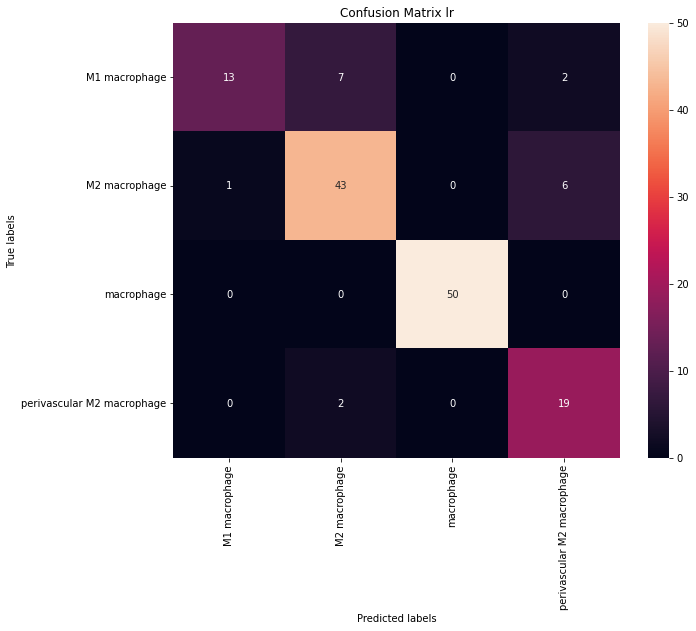

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

## oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

M2 macrophage                 200
macrophage                    200
M1 macrophage                  88
perivascular M2 macrophage     81
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'macrophage': 200,
    'M2 macrophage': 200,
    'M1 macrophage': 100,
    'perivascular M2 macrophage': 100
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

M2 macrophage                 200
macrophage                    200
M1 macrophage                  88
perivascular M2 macrophage     81
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

M2 macrophage                 200
macrophage                    200
M1 macrophage                 100
perivascular M2 macrophage    100
Name: cell_state, dtype: int64

### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.91661455, 0.92591286, 0.90003166, 0.87293739, 0.7018402 ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_macrophage_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_macrophage_smote.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  88.81
F1 weighted of logistic regression model :  88.95
F1 macro of logistic regression model :  85.93


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                            precision    recall  f1-score   support

             M1 macrophage       0.89      0.77      0.83        22
             M2 macrophage       0.88      0.86      0.87        50
                macrophage       1.00      1.00      1.00        50
perivascular M2 macrophage       0.68      0.81      0.74        21

                  accuracy                           0.89       143
                 macro avg       0.86      0.86      0.86       143
              weighted avg       0.89      0.89      0.89       143



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[17,  3,  0,  2],
       [ 1, 43,  0,  6],
       [ 0,  0, 50,  0],
       [ 1,  3,  0, 17]])

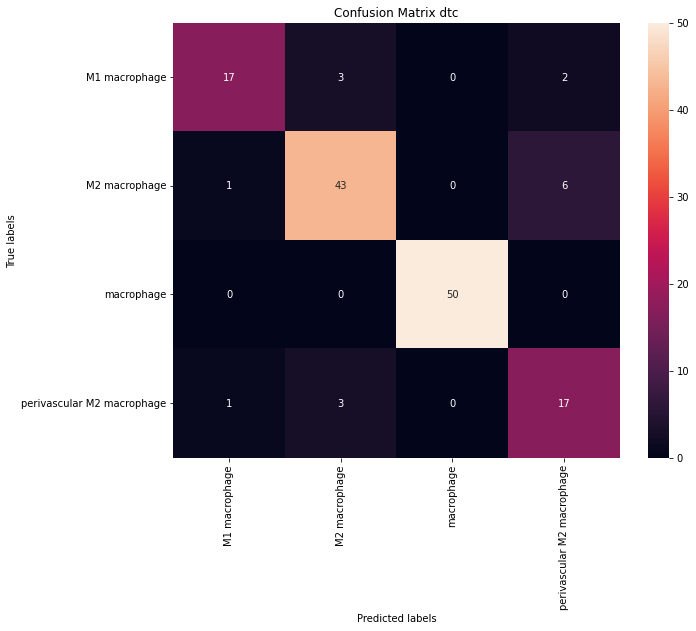

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 6. Monocytes

In [ ]:
df = data[data['cell_type'] == 'monocyte']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df['cell_state'].value_counts()}), pd.DataFrame({'percentage': df['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
non-classical monocyte,250,0.5
classical monocyte,250,0.5


## split data

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.96244719, 0.92457574, 0.93749023, 0.94996873, 0.9372549 ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_monocyte.sav'
joblib.dump(lr, filename)

['lr_model_monocyte.sav']

## evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  95.0
F1 of logistic regression model :  95.0
F1 macro of logistic regression model :  95.0


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                        precision    recall  f1-score   support

    classical monocyte       0.92      0.98      0.95        50
non-classical monocyte       0.98      0.92      0.95        50

              accuracy                           0.95       100
             macro avg       0.95      0.95      0.95       100
          weighted avg       0.95      0.95      0.95       100



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[49,  1],
       [ 4, 46]])

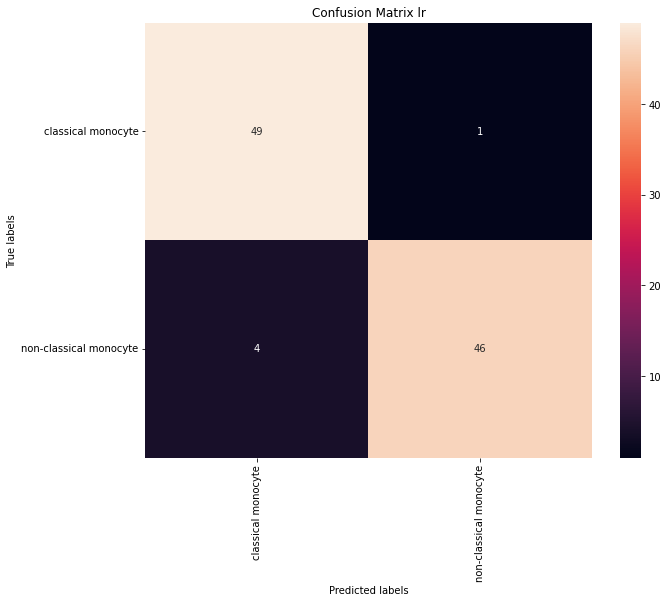

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

**oversampling with SMOTEN does not make sense since we only have 2 classes and both have 250 data points**

# 7. T Cells

In [ ]:
df_all = data[data['cell_type'] == 'T-cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_all['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_all['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
T-cell (unspecified),250,0.055102
CD4 T-cell (unspecified),250,0.055102
NK T-cell (unspecified),250,0.055102
CD8 cytotoxic T-cell (unspecified),250,0.055102
CD8 exhausted cytotoxic T-cell (unspecified),250,0.055102
CD8 exhausted T-cell (unspecified),250,0.055102
CD8 T-cell (unspecified),250,0.055102
CD8 effector memory T-cell,250,0.055102
CD8 exhausted resident memory T-cell,250,0.055102
CD8 activated T-cell (unspecified),250,0.055102


## 7.1 all subclasses at once

### split data

In [ ]:
X = df_all.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df_all['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 40min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.77805066, 0.78099942, 0.76295015, 0.76370293, 0.75875322])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_all.sav'
joblib.dump(lr, filename)

['lr_model_t_cells.sav']

### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  80.4
F1 of logistic regression model :  79.67
F1 macro of logistic regression model :  71.98


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                    CD4 T-cell (unspecified)       0.84      0.62      0.71        50
                   CD4 central memory T-cell       0.80      0.36      0.50        11
                CD4 follicular helper T-cell       1.00      0.98      0.99        50
             CD4 helper T-cell (unspecified)       0.77      0.96      0.86        50
                            CD4 naive T-cell       0.83      0.86      0.84        50
         CD4 regulatory T-cell (unspecified)       0.94      0.94      0.94        50
                    CD8 T-cell (unspecified)       0.72      0.82      0.77        50
          CD8 activated T-cell (unspecified)       0.62      0.56      0.59        50
                   CD8 central memory T-cell       0.00      0.00      0.00         6
          CD8 cytotoxic T-cell (unspecified)       0.64      0.68      0.66        50
                  CD8 effector memory T-cell       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[31,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,
         0, 10,  0,  3,  0],
       [ 0,  4,  0,  3,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 1,  0,  0, 48,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 43,  2,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 47,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 41,  3,  0,  0,  4,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  2, 28,  0,  0, 19,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 2,  0,  0,  2,  0,  0,  0,  0,  0, 34,  0,  0,  4,  8,  0,  0,
         0,  0,  0,

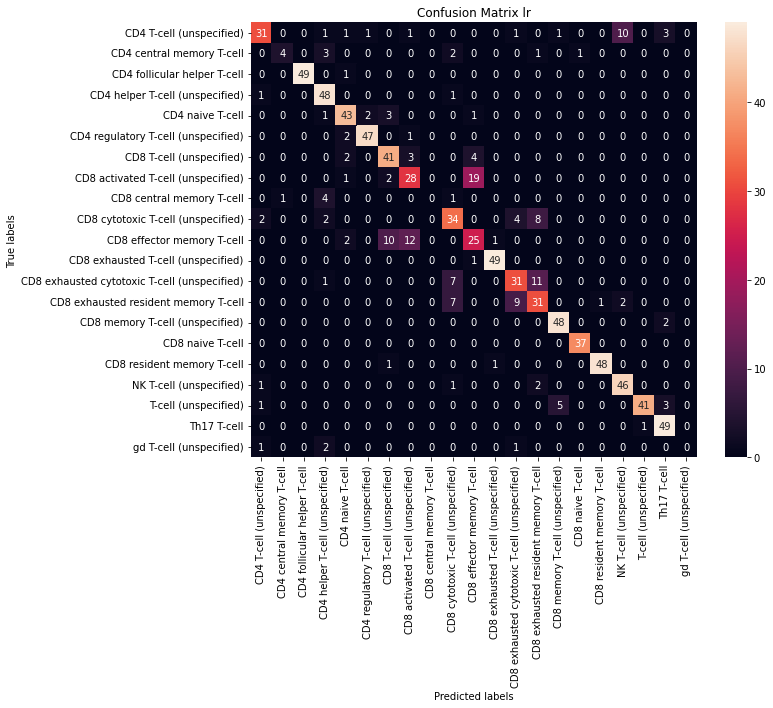

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

### oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

CD8 cytotoxic T-cell (unspecified)              200
T-cell (unspecified)                            200
CD8 resident memory T-cell                      200
CD4 helper T-cell (unspecified)                 200
CD4 T-cell (unspecified)                        200
CD4 naive T-cell                                200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 T-cell (unspecified)                        200
CD8 exhausted resident memory T-cell            200
CD8 activated T-cell (unspecified)              200
NK T-cell (unspecified)                         200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
CD8 exhausted T-cell (unspecified)              200
Th17 T-cell                                     200
CD8 memory T-cell (unspecified)                 200
CD4 follicular helper T-cell                    200
CD8 naive T-cell                                146
CD4 central memory T-cell                        42
CD8 central 

In [ ]:
oversampling_weights= {
    'CD8 exhausted T-cell (unspecified)': 200,
    'CD8 activated T-cell (unspecified)': 200,
    'Th17 T-cell': 200,
    'CD4 follicular helper T-cell': 200,
    'CD8 cytotoxic T-cell (unspecified)': 200,
    'NK T-cell (unspecified)': 200,
    'CD4 regulatory T-cell (unspecified)': 200,
    'CD8 effector memory T-cell': 200,
    'CD4 helper T-cell (unspecified)': 200,
    'CD8 naive T-cell': 200,
    'CD8 T-cell (unspecified)': 200,
    'CD4 T-cell (unspecified)': 200,
    'CD8 exhausted cytotoxic T-cell (unspecified)': 200,
    'T-cell (unspecified)': 200,
    'CD4 naive T-cell': 200,
    'CD8 memory T-cell (unspecified)': 200,
    'CD8 exhausted resident memory T-cell': 200,
    'CD8 resident memory T-cell': 200,
    'CD4 central memory T-cell': 120,
    'CD8 central memory T-cell': 80,
    'gd T-cell (unspecified)': 50
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

CD8 cytotoxic T-cell (unspecified)              200
T-cell (unspecified)                            200
CD8 resident memory T-cell                      200
CD4 helper T-cell (unspecified)                 200
CD4 T-cell (unspecified)                        200
CD4 naive T-cell                                200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 T-cell (unspecified)                        200
CD8 exhausted resident memory T-cell            200
CD8 activated T-cell (unspecified)              200
NK T-cell (unspecified)                         200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
CD8 exhausted T-cell (unspecified)              200
Th17 T-cell                                     200
CD8 memory T-cell (unspecified)                 200
CD4 follicular helper T-cell                    200
CD8 naive T-cell                                146
CD4 central memory T-cell                        42
CD8 central 

In [ ]:
y_train_smote.value_counts()

CD8 cytotoxic T-cell (unspecified)              200
CD8 exhausted resident memory T-cell            200
CD8 resident memory T-cell                      200
CD4 helper T-cell (unspecified)                 200
CD4 T-cell (unspecified)                        200
CD4 naive T-cell                                200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 naive T-cell                                200
CD8 T-cell (unspecified)                        200
CD8 activated T-cell (unspecified)              200
T-cell (unspecified)                            200
NK T-cell (unspecified)                         200
CD8 effector memory T-cell                      200
CD4 regulatory T-cell (unspecified)             200
CD8 exhausted T-cell (unspecified)              200
Th17 T-cell                                     200
CD8 memory T-cell (unspecified)                 200
CD4 follicular helper T-cell                    200
CD4 central memory T-cell                       120
CD8 central 

#### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 29min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.7323605 , 0.77618237, 0.80264245, 0.80020407, 0.78786606])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_all_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_t_cells_smote.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  80.18
F1 weighted of logistic regression model :  79.46
F1 macro of logistic regression model :  71.86


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                                              precision    recall  f1-score   support

                    CD4 T-cell (unspecified)       0.81      0.60      0.69        50
                   CD4 central memory T-cell       0.62      0.45      0.53        11
                CD4 follicular helper T-cell       1.00      0.98      0.99        50
             CD4 helper T-cell (unspecified)       0.80      0.94      0.86        50
                            CD4 naive T-cell       0.83      0.86      0.84        50
         CD4 regulatory T-cell (unspecified)       0.94      0.94      0.94        50
                    CD8 T-cell (unspecified)       0.71      0.80      0.75        50
          CD8 activated T-cell (unspecified)       0.62      0.56      0.59        50
                   CD8 central memory T-cell       0.00      0.00      0.00         6
          CD8 cytotoxic T-cell (unspecified)       0.62      0.62      0.62        50
                  CD8 effector memory T-cell       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[30,  0,  0,  1,  1,  1,  0,  1,  0,  0,  0,  0,  1,  0,  1,  0,
         0, 10,  1,  3,  0],
       [ 0,  5,  0,  2,  0,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 2,  0,  0, 47,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  2,  3,  0,  0,  0,  1,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2, 47,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 40,  3,  0,  0,  4,  0,  0,  0,  0,  1,
         0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  2, 28,  0,  0, 19,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0],
       [ 2,  2,  0,  2,  0,  0,  0,  0,  0, 31,  0,  0,  5,  8,  0,  0,
         0,  0,  0,

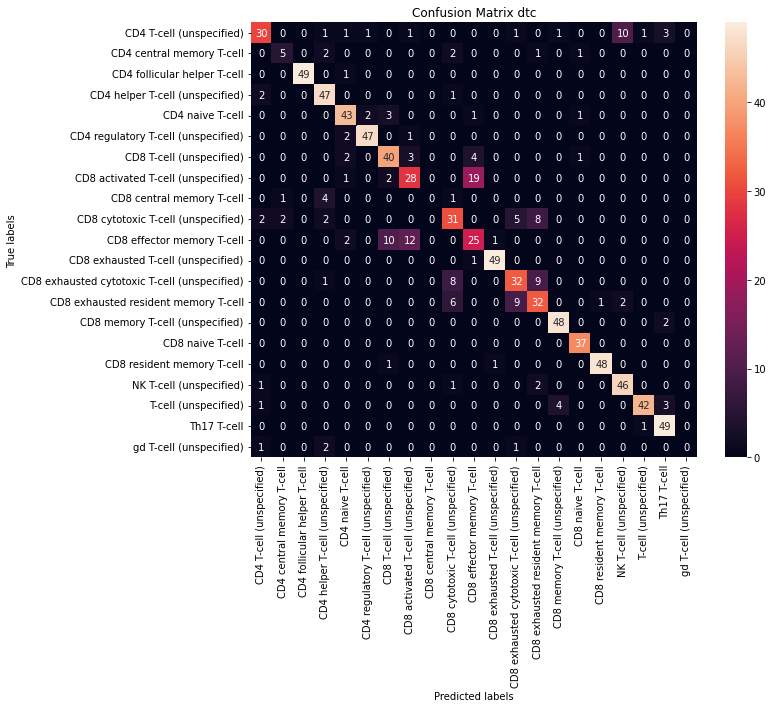

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

## 7.2 hierarchical

### 7.2.1 CD8, CD4 and other T cells

#### split data

In [ ]:
X = df_all.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df_all['cell_type_2']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD8 T-cell      1972
CD4 T-cell      1042
other T-cell     615
Name: cell_type_2, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.87280934, 0.87417268, 0.89508464, 0.90487569, 0.88602845])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_type2.sav'
joblib.dump(lr, filename)

['lr_model_t_cells_type2.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  88.0
F1 of logistic regression model :  87.97
F1 macro of logistic regression model :  86.11


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

  CD4 T-cell       0.86      0.83      0.84       261
  CD8 T-cell       0.91      0.92      0.92       493
other T-cell       0.82      0.83      0.82       154

    accuracy                           0.88       908
   macro avg       0.86      0.86      0.86       908
weighted avg       0.88      0.88      0.88       908



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[216,  28,  17],
       [ 26, 455,  12],
       [  9,  17, 128]])

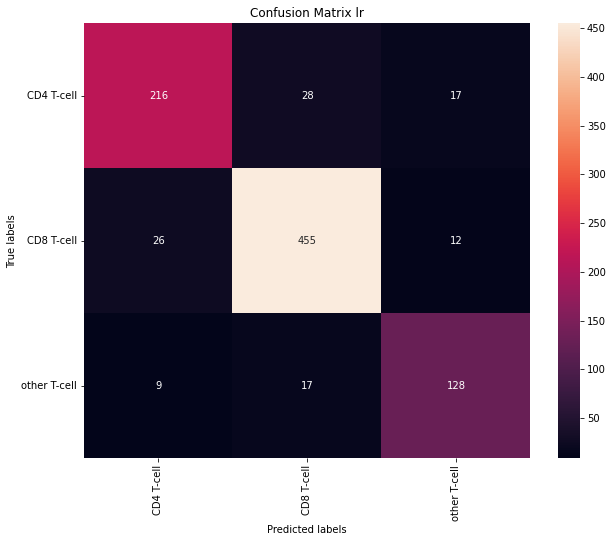

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

#### oversample with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

CD8 T-cell      1972
CD4 T-cell      1042
other T-cell     615
Name: cell_type_2, dtype: int64

In [ ]:
oversampling_weights= {
    'CD8 T-cell': 2039,
    'CD4 T-cell': 1066,
    'other T-cell': 1000
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2039) in class CD8 T-cell will be larger than the number of samples in the majority class (class #CD8 T-cell -> 1972)
  f"After over-sampling, the number of samples ({n_samples})"


In [ ]:
y_train.value_counts()

CD8 T-cell      1972
CD4 T-cell      1042
other T-cell     615
Name: cell_type_2, dtype: int64

In [ ]:
y_train_smote.value_counts()

CD8 T-cell      2039
CD4 T-cell      1066
other T-cell    1000
Name: cell_type_2, dtype: int64

##### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 1min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.86415079, 0.88154184, 0.87139194, 0.93275506, 0.8310233 ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_t_cells_type2_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_t_cells_type2_smote.sav']

##### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  87.67
F1 weighted of logistic regression model :  87.66
F1 macro of logistic regression model :  85.63


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

              precision    recall  f1-score   support

  CD4 T-cell       0.86      0.84      0.85       261
  CD8 T-cell       0.91      0.91      0.91       493
other T-cell       0.80      0.81      0.81       154

    accuracy                           0.88       908
   macro avg       0.86      0.86      0.86       908
weighted avg       0.88      0.88      0.88       908



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[220,  25,  16],
       [ 27, 451,  15],
       [ 10,  19, 125]])

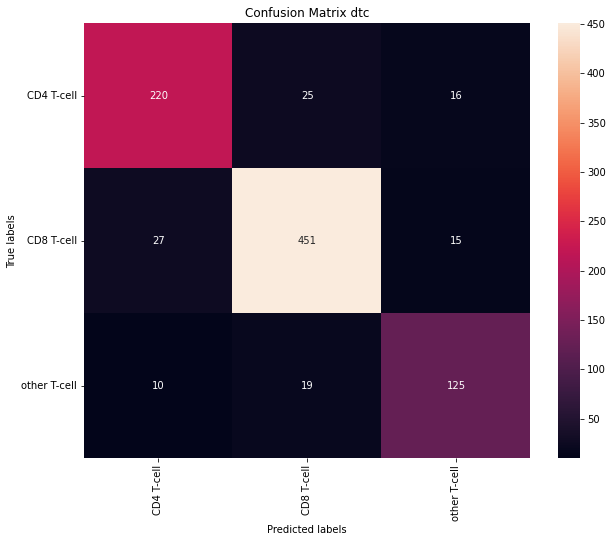

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

### 7.2.2 CD8 cells

#### split data

In [ ]:
df = df_all[df_all['cell_type_2'] == 'CD8 T-cell']
df['cell_state'].value_counts()

CD8 activated T-cell (unspecified)              250
CD8 exhausted resident memory T-cell            250
CD8 effector memory T-cell                      250
CD8 T-cell (unspecified)                        250
CD8 exhausted cytotoxic T-cell (unspecified)    250
CD8 exhausted T-cell (unspecified)              250
CD8 resident memory T-cell                      250
CD8 memory T-cell (unspecified)                 250
CD8 cytotoxic T-cell (unspecified)              250
CD8 naive T-cell                                183
CD8 central memory T-cell                        32
Name: cell_state, dtype: int64

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD8 memory T-cell (unspecified)                 200
CD8 exhausted resident memory T-cell            200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 effector memory T-cell                      200
CD8 resident memory T-cell                      200
CD8 T-cell (unspecified)                        200
CD8 exhausted T-cell (unspecified)              200
CD8 cytotoxic T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 naive T-cell                                146
CD8 central memory T-cell                        26
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.78142595, 0.75493224, 0.79799111, 0.77711765, 0.77073776])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd8.sav'
joblib.dump(lr, filename)

['lr_model_cd8.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  79.31
F1 of logistic regression model :  78.79
F1 macro of logistic regression model :  72.96


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                              precision    recall  f1-score   support

                    CD8 T-cell (unspecified)       0.76      0.88      0.81        50
          CD8 activated T-cell (unspecified)       0.66      0.74      0.70        50
                   CD8 central memory T-cell       0.00      0.00      0.00         6
          CD8 cytotoxic T-cell (unspecified)       0.62      0.80      0.70        50
                  CD8 effector memory T-cell       0.59      0.52      0.55        50
          CD8 exhausted T-cell (unspecified)       0.98      0.88      0.93        50
CD8 exhausted cytotoxic T-cell (unspecified)       0.75      0.60      0.67        50
        CD8 exhausted resident memory T-cell       0.73      0.70      0.71        50
             CD8 memory T-cell (unspecified)       0.98      0.98      0.98        50
                            CD8 naive T-cell       0.97      1.00      0.99        37
                  CD8 resident memory T-cell       1.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[44,  1,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 3, 37,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  0, 40,  0,  0,  3,  6,  0,  0,  0],
       [10, 14,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  2, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0, 30,  7,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  7, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 49]])

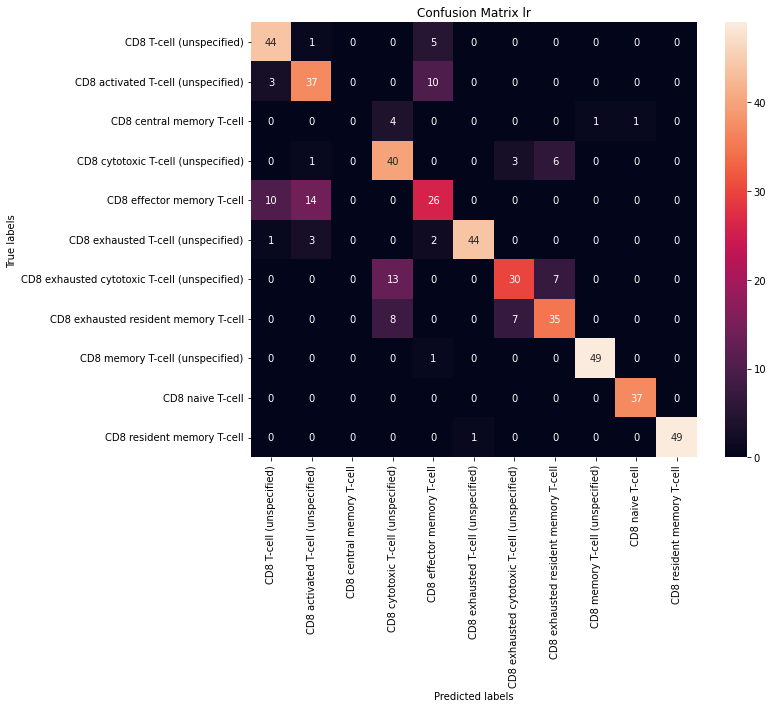

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

#### oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

CD8 memory T-cell (unspecified)                 200
CD8 exhausted resident memory T-cell            200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 effector memory T-cell                      200
CD8 resident memory T-cell                      200
CD8 T-cell (unspecified)                        200
CD8 exhausted T-cell (unspecified)              200
CD8 cytotoxic T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 naive T-cell                                146
CD8 central memory T-cell                        26
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'CD8 memory T-cell (unspecified)': 200,
    'CD8 naive T-cell': 200,
    'CD8 resident memory T-cell': 200,
    'CD8 exhausted resident memory T-cell': 200,
    'CD8 cytotoxic T-cell (unspecified)': 200,
    'CD8 T-cell (unspecified)': 200,
    'CD8 exhausted cytotoxic T-cell (unspecified)': 200,
    'CD8 activated T-cell (unspecified)': 200,
    'CD8 exhausted T-cell (unspecified)': 200,
    'CD8 effector memory T-cell': 200,
    'CD8 central memory T-cell': 100
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

CD8 memory T-cell (unspecified)                 200
CD8 exhausted resident memory T-cell            200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 effector memory T-cell                      200
CD8 resident memory T-cell                      200
CD8 T-cell (unspecified)                        200
CD8 exhausted T-cell (unspecified)              200
CD8 cytotoxic T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 naive T-cell                                146
CD8 central memory T-cell                        26
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

CD8 naive T-cell                                200
CD8 memory T-cell (unspecified)                 200
CD8 exhausted resident memory T-cell            200
CD8 exhausted cytotoxic T-cell (unspecified)    200
CD8 effector memory T-cell                      200
CD8 resident memory T-cell                      200
CD8 T-cell (unspecified)                        200
CD8 exhausted T-cell (unspecified)              200
CD8 cytotoxic T-cell (unspecified)              200
CD8 activated T-cell (unspecified)              200
CD8 central memory T-cell                       100
Name: cell_state, dtype: int64

##### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 19min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.75835275, 0.77284141, 0.8253304 , 0.8081199 , 0.79955349])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd8_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_cd8_smote.sav']

##### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  79.11
F1 weighted of logistic regression model :  78.86
F1 macro of logistic regression model :  74.8


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                                              precision    recall  f1-score   support

                    CD8 T-cell (unspecified)       0.76      0.88      0.81        50
          CD8 activated T-cell (unspecified)       0.66      0.74      0.70        50
                   CD8 central memory T-cell       0.33      0.17      0.22         6
          CD8 cytotoxic T-cell (unspecified)       0.62      0.78      0.69        50
                  CD8 effector memory T-cell       0.59      0.52      0.55        50
          CD8 exhausted T-cell (unspecified)       0.98      0.88      0.93        50
CD8 exhausted cytotoxic T-cell (unspecified)       0.74      0.58      0.65        50
        CD8 exhausted resident memory T-cell       0.73      0.70      0.71        50
             CD8 memory T-cell (unspecified)       0.98      0.98      0.98        50
                            CD8 naive T-cell       0.97      1.00      0.99        37
                  CD8 resident memory T-cell       1.

In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[44,  1,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 3, 37,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  1,  1, 39,  0,  0,  3,  6,  0,  0,  0],
       [10, 14,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  2, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 13,  0,  0, 29,  7,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  7, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 49,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0, 49]])

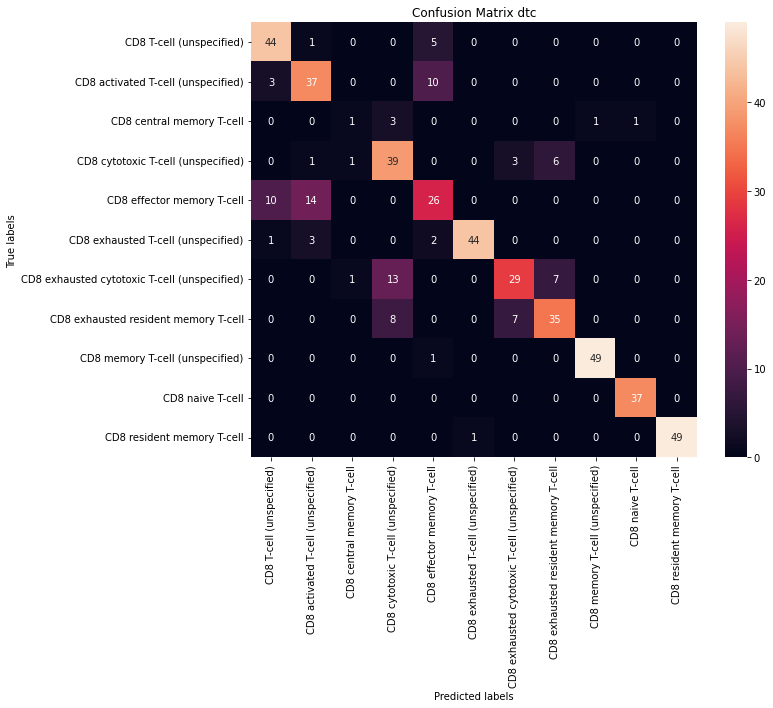

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

### 7.2.3 CD4 cells

#### split data

In [ ]:
df = df_all[df_all['cell_type_2'] == 'CD4 T-cell']
df['cell_state'].value_counts()

CD4 T-cell (unspecified)               250
CD4 follicular helper T-cell           250
CD4 regulatory T-cell (unspecified)    250
CD4 naive T-cell                       250
CD4 helper T-cell (unspecified)        250
CD4 central memory T-cell               53
Name: cell_state, dtype: int64

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

CD4 follicular helper T-cell           200
CD4 regulatory T-cell (unspecified)    200
CD4 T-cell (unspecified)               200
CD4 helper T-cell (unspecified)        200
CD4 naive T-cell                       200
CD4 central memory T-cell               42
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.91623567, 0.89590796, 0.89701444, 0.92853646, 0.9352279 ])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd4.sav'
joblib.dump(lr, filename)

['lr_model_cd4.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  93.1
F1 of logistic regression model :  93.04
F1 macro of logistic regression model :  90.52


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                                     precision    recall  f1-score   support

           CD4 T-cell (unspecified)       1.00      0.90      0.95        50
          CD4 central memory T-cell       0.88      0.64      0.74        11
       CD4 follicular helper T-cell       1.00      0.96      0.98        50
    CD4 helper T-cell (unspecified)       0.89      1.00      0.94        50
                   CD4 naive T-cell       0.83      1.00      0.91        50
CD4 regulatory T-cell (unspecified)       0.98      0.86      0.91        50

                           accuracy                           0.93       261
                          macro avg       0.93      0.89      0.91       261
                       weighted avg       0.94      0.93      0.93       261



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[45,  1,  0,  2,  1,  1],
       [ 0,  7,  0,  4,  0,  0],
       [ 0,  0, 48,  0,  2,  0],
       [ 0,  0,  0, 50,  0,  0],
       [ 0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  7, 43]])

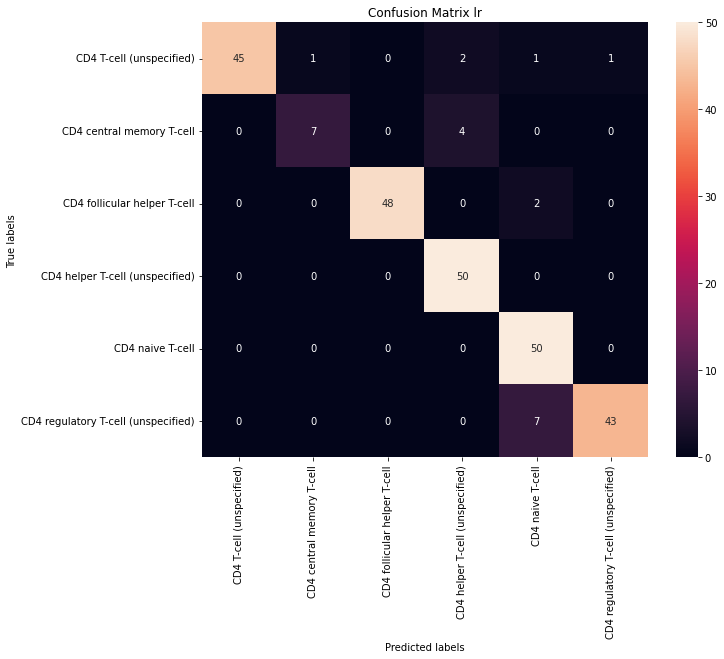

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

#### oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

CD4 follicular helper T-cell           200
CD4 regulatory T-cell (unspecified)    200
CD4 T-cell (unspecified)               200
CD4 helper T-cell (unspecified)        200
CD4 naive T-cell                       200
CD4 central memory T-cell               42
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'CD4 follicular helper T-cell': 200,
    'CD4 regulatory T-cell (unspecified)': 200,
    'CD4 T-cell (unspecified)': 200,
    'CD4 helper T-cell (unspecified)': 200,
    'CD4 naive T-cell': 200,
    'CD4 central memory T-cell': 80
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

CD4 follicular helper T-cell           200
CD4 regulatory T-cell (unspecified)    200
CD4 T-cell (unspecified)               200
CD4 helper T-cell (unspecified)        200
CD4 naive T-cell                       200
CD4 central memory T-cell               42
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

CD4 follicular helper T-cell           200
CD4 regulatory T-cell (unspecified)    200
CD4 T-cell (unspecified)               200
CD4 helper T-cell (unspecified)        200
CD4 naive T-cell                       200
CD4 central memory T-cell               80
Name: cell_state, dtype: int64

##### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 19min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.88050854, 0.88720985, 0.89628141, 0.95370153, 0.94908277])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_cd4_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_cd4_smote.sav']

##### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  92.34
F1 weighted of logistic regression model :  92.21
F1 macro of logistic regression model :  88.43


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                                     precision    recall  f1-score   support

           CD4 T-cell (unspecified)       1.00      0.88      0.94        50
          CD4 central memory T-cell       0.75      0.55      0.63        11
       CD4 follicular helper T-cell       1.00      0.96      0.98        50
    CD4 helper T-cell (unspecified)       0.88      1.00      0.93        50
                   CD4 naive T-cell       0.83      1.00      0.91        50
CD4 regulatory T-cell (unspecified)       0.98      0.86      0.91        50

                           accuracy                           0.92       261
                          macro avg       0.91      0.87      0.88       261
                       weighted avg       0.93      0.92      0.92       261



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[44,  2,  0,  2,  1,  1],
       [ 0,  6,  0,  5,  0,  0],
       [ 0,  0, 48,  0,  2,  0],
       [ 0,  0,  0, 50,  0,  0],
       [ 0,  0,  0,  0, 50,  0],
       [ 0,  0,  0,  0,  7, 43]])

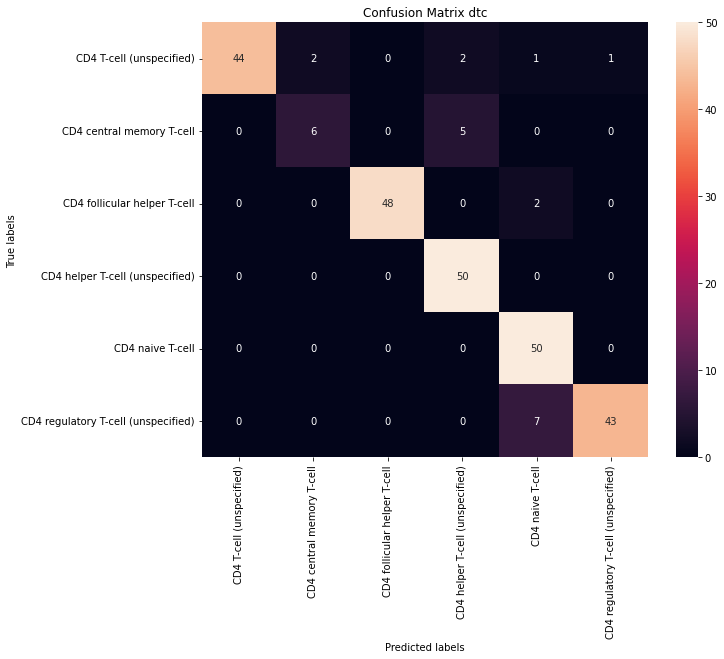

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

### 7.2.4 other T-cells

#### split data

In [ ]:
df = df_all[df_all['cell_type_2'] == 'other T-cell']
df['cell_state'].value_counts()

T-cell (unspecified)       250
Th17 T-cell                250
NK T-cell (unspecified)    250
gd T-cell (unspecified)     19
Name: cell_state, dtype: int64

In [ ]:
X = df.drop(columns=['cell_state', 'cell_type', 'cell_type_2'])
y = df['cell_state']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
y_train.value_counts()

T-cell (unspecified)       200
Th17 T-cell                200
NK T-cell (unspecified)    200
gd T-cell (unspecified)     15
Name: cell_state, dtype: int64

#### train model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train) # takes about 15min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1_weighted')
lr_scores

array([0.95600739, 0.95553548, 0.93125359, 0.93943083, 0.96361538])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_other-t-cell.sav'
joblib.dump(lr, filename)

['lr_model_other-t-cell.sav']

#### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_t_cells.sav'
# lr = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred = lr.predict(X_test)

# Calculating the accuracy and F1
acc_lr = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
f1_lr = round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
f1_lr_macro = round(metrics.f1_score(y_test, y_pred, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr)
print('F1 of logistic regression model : ', f1_lr)
print('F1 macro of logistic regression model : ', f1_lr_macro)

Accuracy of logistic regression model :  96.75
F1 of logistic regression model :  95.48
F1 macro of logistic regression model :  73.52


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

                         precision    recall  f1-score   support

NK T-cell (unspecified)       0.96      1.00      0.98        50
   T-cell (unspecified)       0.96      0.98      0.97        50
            Th17 T-cell       0.98      1.00      0.99        50
gd T-cell (unspecified)       0.00      0.00      0.00         4

               accuracy                           0.97       154
              macro avg       0.73      0.74      0.74       154
           weighted avg       0.94      0.97      0.95       154



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  0,  0,  0],
       [ 0, 49,  1,  0],
       [ 0,  0, 50,  0],
       [ 2,  2,  0,  0]])

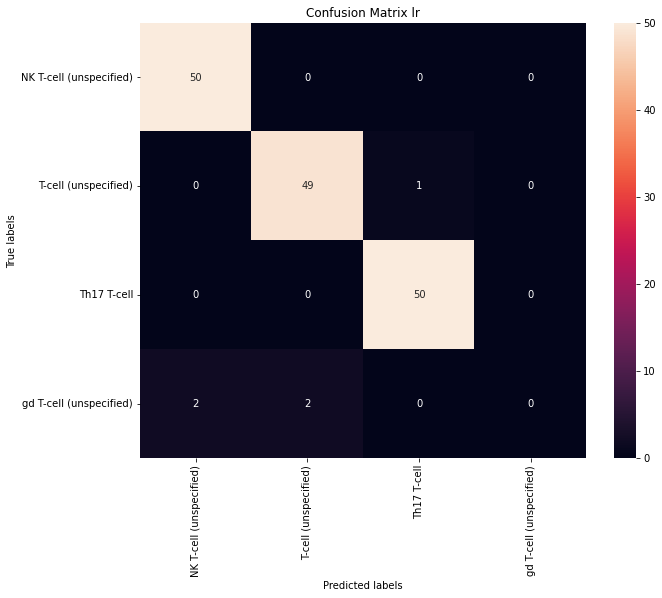

In [ ]:
fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix lr'); 
plt.savefig('confusion_matrix_lr_t_cells.png')
plt.show()

#### oversampling with SMOTEN

have to pass data in it's naked format NOT in hot coded

need to use split data since only train data has to be oversampled

In [ ]:
from imblearn.over_sampling import SMOTEN

In [ ]:
y_train.value_counts()

T-cell (unspecified)       200
Th17 T-cell                200
NK T-cell (unspecified)    200
gd T-cell (unspecified)     15
Name: cell_state, dtype: int64

In [ ]:
oversampling_weights= {
    'NK T-cell (unspecified)': 200,
    'T-cell (unspecified)': 200,
    'Th17 T-cell': 200,
    'gd T-cell (unspecified)': 50
}

In [ ]:
smtn = SMOTEN(random_state=0, sampling_strategy=oversampling_weights)
X_train_smote, y_train_smote = smtn.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

T-cell (unspecified)       200
Th17 T-cell                200
NK T-cell (unspecified)    200
gd T-cell (unspecified)     15
Name: cell_state, dtype: int64

In [ ]:
y_train_smote.value_counts()

T-cell (unspecified)       200
NK T-cell (unspecified)    200
Th17 T-cell                200
gd T-cell (unspecified)     50
Name: cell_state, dtype: int64

##### train lr

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_smote = LogisticRegression(max_iter=10000)
lr_smote.fit(X_train_smote, y_train_smote) #takes about 19min

LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.model_selection import cross_val_score
lr_smote_scores = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=5, scoring='f1_weighted')
lr_smote_scores

array([0.8799079 , 0.95077097, 0.96888559, 0.97689058, 0.97705754])

In [ ]:
# save the model to disk
import joblib
filename = 'lr_model_other-t-cell_smote.sav'
joblib.dump(lr_smote, filename)

['lr_model_other-t-cell_smote.sav']

##### evaluate model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
# # load model
# import joblib
# filename = '/content/gdrive/MyDrive/Idorsia Capstone Project/models/lr_model_10.sav'
# dtc = joblib.load(filename)
# # result = clf.score(X_test, y_test)
# # print(result)

In [ ]:
# Prediction on test set
y_pred_smote = lr_smote.predict(X_test)

# Calculating the accuracy and F1
acc_lr_smote = round(metrics.accuracy_score(y_test, y_pred_smote) * 100, 2 )
f1_lr_smote = round(metrics.f1_score(y_test, y_pred_smote, average='weighted') * 100, 2)
f1_lr_smote_macro = round(metrics.f1_score(y_test, y_pred_smote, average='macro') * 100, 2)
print('Accuracy of logistic regression model : ', acc_lr_smote)
print('F1 weighted of logistic regression model : ', f1_lr_smote)
print('F1 macro of logistic regression model : ', f1_lr_smote_macro)

Accuracy of logistic regression model :  96.75
F1 weighted of logistic regression model :  96.74
F1 macro of logistic regression model :  85.99


In [ ]:
report = classification_report(y_test, y_pred_smote)
print(report)

                         precision    recall  f1-score   support

NK T-cell (unspecified)       0.96      1.00      0.98        50
   T-cell (unspecified)       1.00      0.94      0.97        50
            Th17 T-cell       0.98      1.00      0.99        50
gd T-cell (unspecified)       0.50      0.50      0.50         4

               accuracy                           0.97       154
              macro avg       0.86      0.86      0.86       154
           weighted avg       0.97      0.97      0.97       154



In [ ]:
cm = confusion_matrix(y_test, y_pred_smote)
cm

array([[50,  0,  0,  0],
       [ 0, 47,  1,  2],
       [ 0,  0, 50,  0],
       [ 2,  0,  0,  2]])

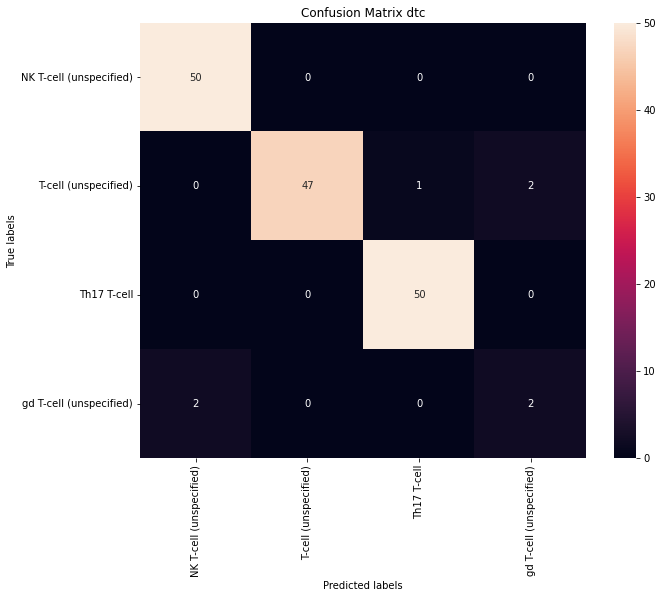

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt     

fig, ax= plt.subplots(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(np.unique(y_train)); ax.yaxis.set_ticklabels(np.unique(y_train));
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.set_title('Confusion Matrix dtc'); 
plt.savefig('confusion_matrix_dtc.png')
plt.show()

# 8. Other Major Cell Types
**All these cell types do not need a model since there are no subclasse**

## 8.1 Myeloid Cells

In [ ]:
df_myeloid = data[data['cell_type'] == 'myeloid cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_myeloid['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_myeloid['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
myeloid cell (unspecified),56,1.0


## 8.2 Plasma Cells

In [ ]:
df_plasma = data[data['cell_type'] == 'plasma cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_plasma['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_plasma['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
plasma cell,250,1.0


## 8.3 Mast Cells

In [ ]:
df_mast = data[data['cell_type'] == 'mast cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_mast['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_mast['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
mast cell,250,1.0


## 8.4 Killer Cells

In [ ]:
df_killer = data[data['cell_type'] == 'killer cell']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_killer['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_killer['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
natural killer cell,250,1.0


## 8.5 Lymphocyte

In [ ]:
df_lymphocyte= data[data['cell_type'] == 'lymphocyte']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_lymphocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_lymphocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
lymphocyte,250,1.0


## 8.6  Leukocyte

In [ ]:
df_leukocyte= data[data['cell_type'] == 'leukocyte']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_leukocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_leukocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
leukocyte,157,1.0


## 8.7 Granulocyte

In [ ]:
df_granulocyte= data[data['cell_type'] == 'granulocyte']

In [ ]:
count_celltype = pd.concat([pd.DataFrame({'count': df_granulocyte['cell_state'].value_counts()}), pd.DataFrame({'percentage': df_granulocyte['cell_state'].value_counts(normalize=True)})], axis=1)
count_celltype

,count,percentage
granulocyte,250,1.0
